In [1]:
from bs4 import BeautifulSoup as bs

import time

import numpy as np
import pandas as pd

from urllib.request import urlopen
import requests

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class scraper:
  def __init__(self):
    self.Rank = []
    self.Mark = []
    self.WIND = []
    self.Competitor = []
    self.DOB = []
    self.Nat = []
    self.Pos = []
    self.Venue = []
    self.Date = []
    self.ResultSCore = []


  def _scrape_data(self, url, attribute):
      # Abrimos la pagina y obtenemos su contenido.
      page = urlopen(url)
      # Creamos un objeto BeautifulSoup para analizar el contenido HTML de la página.
      soup = bs(page.read(), 'html.parser')
      # Utilizamos setattr() para añadir información al atributo especificado de la instancia.
      # Los datos se concatenarán a los existentes en el atributo.
      setattr(self, attribute, getattr(self, attribute, []) + [i.getText().strip() for i in soup.find_all('td', {"data-th": attribute})])


  def scrape_records(self, iterations):
    # Loop para iterar en todas las paginaciones de la target url.
    for i in range(1, iterations):
      url = f'https://worldathletics.org/records/all-time-toplists/sprints/100-metres/outdoor/men/senior?regionType=world&timing=electronic&windReading=all&page={i}&bestResultsOnly=false&firstDay=1899-12-31&lastDa'

      self._scrape_data(url, 'Rank')
      self._scrape_data(url, 'Mark')
      self._scrape_data(url, 'WIND')
      self._scrape_data(url, 'Competitor')
      self._scrape_data(url, 'DOB')
      self._scrape_data(url, 'Nat')
      self._scrape_data(url, 'Pos')
      self._scrape_data(url, 'Venue')
      self._scrape_data(url, 'Date')
      self._scrape_data(url, 'ResultScore')

      time.sleep(3)

  def results(self):
    resultados = pd.DataFrame([self.Rank, self.Mark, self.WIND, self.Competitor, self.DOB, self.Nat, self.Pos, self.Venue, self.Date, self.ResultSCore]).transpose()
    resultados.columns = ['rank', 'mark', 'wind', 'competitor', 'dob', 'nat', 'pos', 'venue', 'date', 'resultscore']
    return resultados

In [3]:
hundred = scraper()

In [4]:
hundred.scrape_records(345)

In [5]:
data = hundred.results()

In [6]:
data

,rank,mark,wind,competitor,dob,nat,pos,venue,date,resultscore
0,1,9.58,+0.9,Usain BOLT,21 AUG 1986,JAM,1,"Olympiastadion, Berlin (GER)",16 AUG 2009,None
1,2,9.63,+1.5,Usain BOLT,21 AUG 1986,JAM,1,"Olympic Stadium, London (GBR)",05 AUG 2012,None
2,3,9.68,+4.1,Tyson GAY,09 AUG 1982,USA,1,"Eugene, OR (USA)",29 JUN 2008,None
3,4,9.69,+5.0,Obadele THOMPSON,30 MAR 1976,BAR,1,"El Paso, TX (USA)",13 APR 1996,None
4,4,9.69,0.0,Usain BOLT,21 AUG 1986,JAM,1,"National Stadium, Beijing (CHN)",16 AUG 2008,None
...,...,...,...,...,...,...,...,...,...,...
34395,32156,10.30,+3.1,Adam MUSGROVE,17 JAN 2004,BAH,3h2,"Estadio Nacional - La Sabana, San José (CRC)",21 JUL 2023,None
34396,32156,10.30,+0.2,Qibang LIN,14 JAN 1997,CHN,3,"Sports Center, Quzhou (CHN)",21 JUL 2023,None
34397,32156,10.30,+3.2,Ebrahima CAMARA,18 SEP 1996,GAM,1h3,"Stade R. Bobin, Bondoufle (FRA)",22 JUL 2023,None
34398,32156,10.30,+0.8,Simon PLESSE,15 FEB 2002,SWE,2,"Hällåsens IP, Söderhamn (SWE)",28 JUL 2023,None


In [7]:
data.head()

,rank,mark,wind,competitor,dob,nat,pos,venue,date,resultscore
0,1,9.58,+0.9,Usain BOLT,21 AUG 1986,JAM,1,"Olympiastadion, Berlin (GER)",16 AUG 2009,None
1,2,9.63,+1.5,Usain BOLT,21 AUG 1986,JAM,1,"Olympic Stadium, London (GBR)",05 AUG 2012,None
2,3,9.68,+4.1,Tyson GAY,09 AUG 1982,USA,1,"Eugene, OR (USA)",29 JUN 2008,None
3,4,9.69,+5.0,Obadele THOMPSON,30 MAR 1976,BAR,1,"El Paso, TX (USA)",13 APR 1996,None
4,4,9.69,0.0,Usain BOLT,21 AUG 1986,JAM,1,"National Stadium, Beijing (CHN)",16 AUG 2008,None


A continuacion haremos una breve exploracion de los datos.

In [8]:
# Extraemos el año y el mes de la columna 'date' y lo almacenamos en una nuevas columnas.

data['year'] = [int(i.split()[2]) for i in data['date']]
data['month'] = [i.split()[1] for i in data['date']]

La distribución de tiempos muestra una tendencia sesgada hacia la derecha, indicando la presencia de un conjunto de atletas con tiempos notablemente más rápidos. La mayor concentración de datos se encuentra alrededor de un tiempo de 10.22, mientras que la ocurrencia de tiempos inferiores a 9.90 es poco común, sugiriendo la existencia de un grupo selecto de atletas con rendimientos excepcionalmente veloces.

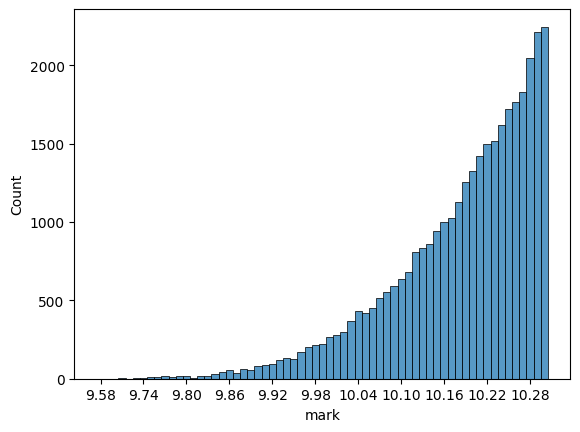

In [9]:
sns.histplot(data=data, x="mark")
plt.xticks(plt.xticks()[0][::6])  # Muestra solo cada n-ésima etiqueta
plt.show()

In [10]:
print(f'La información recopilada se extiende desde el año  {min(data["year"])} hasta el año {max(data["year"])}')

La información recopilada se extiende desde el año  1958 hasta el año 2023


A continuacion vamos a generar una boxplot con las marcas de los competidores en el eje vertical (y). Para el eje (x) se creará una variable  categórica mediante la agrupación de los años en intervalos. Esta categorización permite observar la distribución de las marcas a lo largo del tiempo de manera generalizada, con el objetivo de identificar posibles tendencias o patrones a lo largo del tiempo.

In [11]:
bins = [-np.inf, 1973, 1986, 1999, 2012, np.inf]
labels = ['1960-1973', '1974-1986', '1987-1999', '2000-2012', '2013-2025']

In [12]:
data['Intervalos'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

In [13]:
data['mark'] = data['mark'].astype(float)

<Axes: xlabel='Intervalos', ylabel='mark'>

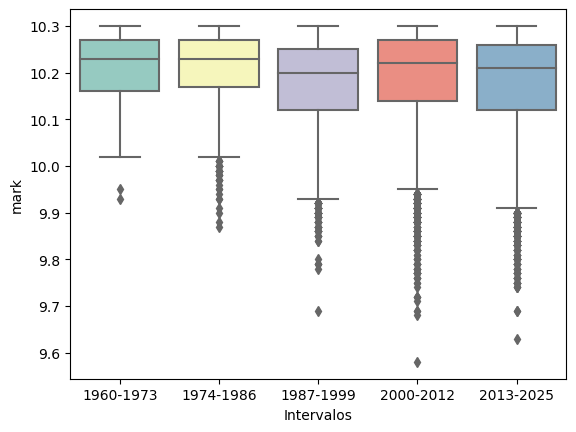

In [14]:
# En términos de medias, gráficamente no parece haber una diferencia notable
# entre los años; sin embargo, las disparidades se hacen evidentes al observar
# los valores atípicos, representativos de atletas con rendimientos excepcionales.
# A partir del año 2000, se vislumbra una mejora significativa en este grupo
# selecto de atletas destacados.

sns.boxplot(x='Intervalos', y='mark', data=data, palette='Set3')

Acontinuacion vamos a hacer una comparativa de las distribuciones de marcas para cada posición de llegada, permitiendo observar posibles variaciones en el rendimiento en función de la posición alcanzada."

In [15]:
posiciones = ['1','2','3','4']

<Axes: xlabel='pos', ylabel='mark'>

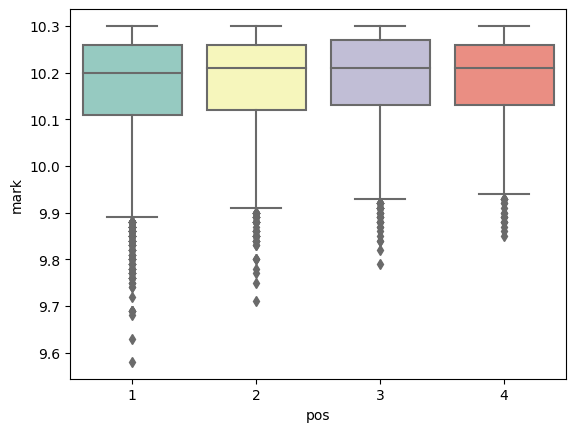

In [16]:
# Al igual que en el boxplot anterior las diferencias las vemos en los ouliers.

sns.boxplot(x='pos', y='mark', data=data.query('pos in @posiciones'), palette='Set3')

Inicialmente, podría considerarse que la velocidad y dirección del viento durante una competición tendrían un impacto notable en el rendimiento de los atletas en eventos de carreras. Sin embargo, al analizar los datos representados, no se observa una fuerte correlación entre estas variables.

In [17]:
data['wind'] = pd.to_numeric(data['wind'], errors='coerce')

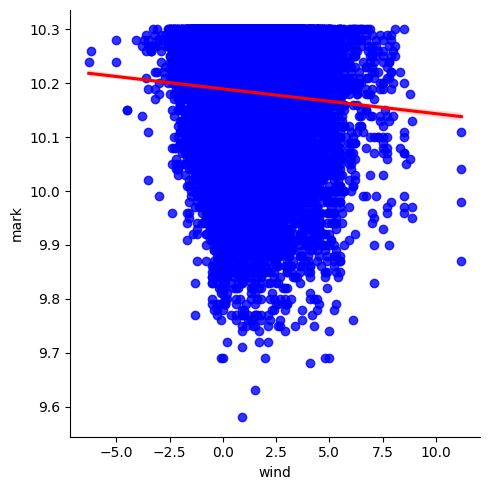

In [18]:
sns.lmplot(x='wind', y='mark', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [20]:
# Top ten competidores que mas veces han participado en competiciones.

competitor_count = data.sort_values('mark').groupby('competitor').size().reset_index(name='count')
competitor_count.sort_values('count', ascending=False).iloc[:10]

,competitor,count
2232,Michael RODGERS,303
1871,Kim COLLINS,253
777,Dennis MITCHELL,223
270,Asafa POWELL,209
2210,Michael FRATER,205
1065,Frank FREDERICKS,198
1058,Francis OBIKWELU,191
1698,Justin GATLIN,187
2007,Linford CHRISTIE,186
1591,Jon DRUMMOND,172


Finalmente, generaremos un gráfico pie plot para visualizar las nacionalidades de los 100 corredores más veloces.

In [32]:
country_count = data.sort_values('mark').iloc[:100].groupby('nat').size().reset_index(name='count')

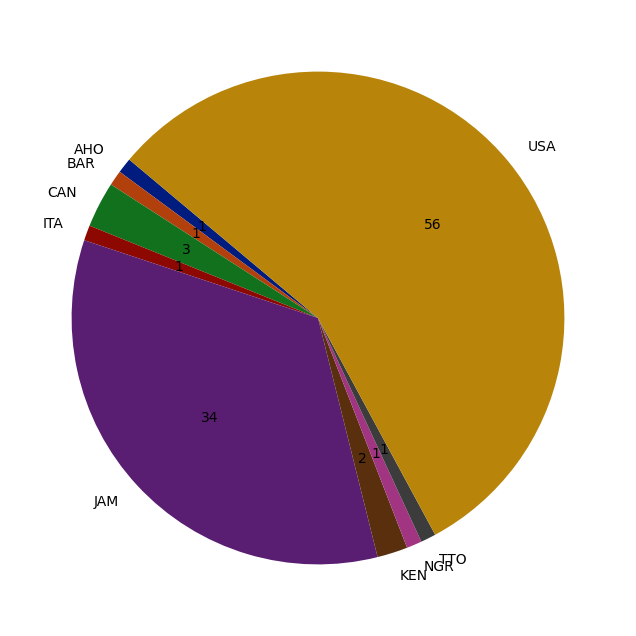

In [33]:
# Observamos un claro dominio de Estados Unidos, seguido de Jamaica

my_palette = sns.color_palette("dark")
plt.figure(figsize=(8, 8))

plt.pie(country_count['count'], labels=country_count['nat'], autopct=lambda p: '{:.0f}'.format(p * sum(country_count['count']) / 100),
        startangle=140, colors=my_palette)

plt.show()